This notebook provides the code used to generate the results related to figures 3, 4, and 5 in the StereoMapper manuscript. 

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Relationship Results (Figures 3 and 4)

In [3]:
# import stereomapper results 
sqlite_file = '/home/jackmcgoldrick/drive/Recon4IMD/WP5_Reconstruction/T5.1_ReconXKG/results/stereomapper/project_results/output_databases/output/stereomapper_output.sqlite' # Additional file 1 from manuscript
conn = sqlite3.connect(sqlite_file)
moldf = pd.read_sql_query("SELECT * FROM relationships", conn)
conn.close()
moldf

,cluster_a,cluster_b,cluster_a_members,cluster_b_members,cluster_a_size,cluster_b_size,classification,score,score_details,extra_info,version_tag
0,2,3,"[""slm:SLM:496071""]","[""slm:SLM:491467""]",1,1,Diastereomers,100.0,"{""confidence_bin"":""high""}",None,v1.0
1,7,8,"[""lipidmaps:LMGP04010069""]","[""slm:SLM:042967""]",1,1,Protomers,95.0,"{""confidence_bin"":""high""}",None,v1.0
2,11,12,"[""slm:SLM:213588""]","[""slm:SLM:213725""]",1,1,Enantiomers,100.0,"{""confidence_bin"":""high""}",None,v1.0
3,13,14,"[""slm:SLM:452819""]","[""slm:SLM:433625""]",1,1,Diastereomers,100.0,"{""confidence_bin"":""high""}",None,v1.0
4,15,16,"[""local:sabiork_1470""]","[""chebi:CHEBI:17994""]",1,1,Parent-child,100.0,"{""confidence_bin"":""high""}",None,v1.0
...,...,...,...,...,...,...,...,...,...,...,...
339453,987901,987902,"[""chebi:CHEBI:8342"", ""hmdb:HMDB0304685"", ""kegg...","[""modelseed:cpd05473""]",3,1,Protomers,81.0,"{""confidence_bin"":""medium""}",None,v1.0
339454,987905,987906,"[""lipidmaps:LMGL03012341"", ""slm:SLM:263813""]","[""slm:SLM:263829""]",2,1,Enantiomers,100.0,"{""confidence_bin"":""high""}",None,v1.0
339455,987910,987911,"[""hmdb:HMDB0248915""]","[""chebi:CHEBI:94378""]",1,1,Parent-child,100.0,"{""confidence_bin"":""high""}",None,v1.0
339456,987922,987923,"[""chebi:CHEBI:64493""]","[""chebi:CHEBI:64514"", ""modelseed:cpd22804""]",1,2,Protomers,95.0,"{""confidence_bin"":""high""}",None,v1.0


In [4]:
moldf.value_counts('classification')

classification
Diastereomers    138728
Enantiomers       93996
Parent-child      61033
Unclassified      27712
Protomers         17924
Unresolved           65
Name: count, dtype: int64

In [5]:
# source code now reflects these changes, keep them in the analysis just for clarity
moldf['classification'] = moldf['classification'].replace({'Planar vs stereo defined structures': 'Parent-child'})
moldf['classification'] = moldf['classification'].replace({'No classification': 'Unclassified'})
moldf['classification'] = moldf['classification'].replace({'Unresolved (Possible Pipeline Error)': 'Unresolved'})
moldf['classification'] = moldf['classification'].replace({'Parent-child': 'Stereo-resolution pairs'})

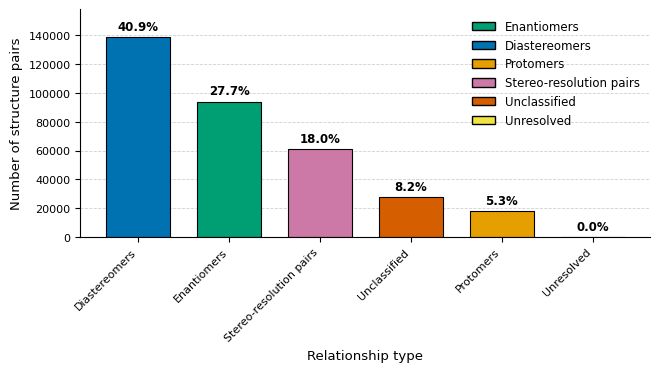

In [6]:
# ==== journal width constraint: 170 mm ====
TEXTWIDTH_MM = 160.0
INCH = 1 / 25.4
FIG_W = TEXTWIDTH_MM * INCH      # 6.69 in
FIG_H = 3.3                      # ~84 mm, safely < 225 mm

# ==== fonts for publication (matching other figures) ====
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "svg.fonttype": "none",

    "font.size": 9.5,
    "axes.titlesize": 10.5,
    "axes.labelsize": 9.5,
    "xtick.labelsize": 8.0,
    "ytick.labelsize": 8.0,
    "legend.fontsize": 8.5,
})

# ==== data ====
rel_counts = moldf["classification"].value_counts(dropna=True)
rel_percentages = rel_counts / rel_counts.sum() * 100

# Palette (Okabe–Ito)
palette = {
    "Enantiomers":             "#009E73",  # bluish green
    "Diastereomers":           "#0072B2",  # dark blue
    "Protomers":               "#E69F00",  # orange
    "Stereo-resolution pairs": "#CC79A7",  # purple
    "Unclassified":            "#D55E00",  # vermilion
    "Unresolved":              "#F0E442",  # yellow
}
default_color = "#999999"

# ==== figure ====
fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

x_labels = rel_counts.index.astype(str).tolist()
x = np.arange(len(x_labels))
y = rel_counts.to_numpy()

colors = [palette.get(lbl, default_color) for lbl in x_labels]

bars = ax.bar(
    x, y, color=colors, width=0.7,
    edgecolor="black", linewidth=0.8
)

# axes labels
ax.set_xlabel("Relationship type")
ax.set_ylabel("Number of structure pairs")

# x tick labels
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# headroom
y_max = y.max() if len(y) else 1
ax.set_ylim(0, y_max * 1.14)

# annotations: percentages on top
for i, lbl in enumerate(x_labels):
    count = rel_counts[lbl]
    pct = rel_percentages[lbl]
    ax.text(
        i, count + y_max * 0.02,
        f"{pct:.1f}%",
        ha="center", va="bottom",
        fontsize=8.5, fontweight="semibold"
    )

# grid and spines
ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

# legend only for classes present
present = [lbl for lbl in palette.keys() if lbl in set(x_labels)]
legend_elements = [
    Patch(facecolor=palette[lbl], edgecolor="black", label=lbl)
    for lbl in present
]
ax.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False
)

# tighten layout within the 170 mm frame
fig.subplots_adjust(left=0.085, right=0.99, bottom=0.28, top=0.97)

plt.show()


Total relationships (excluding ['Unclassified', 'Unresolved']): 311681
classification
Diastereomers              138728
Enantiomers                 93996
Stereo-resolution pairs     61033
Protomers                   17924
Name: count, dtype: int64

Overall confidence-bin summary (filtered):
Confidence bin  Count  % of total
           low   1290        0.41
        medium  55129       17.69
          high 255174       81.87

Counts by class x bin (filtered):
confidence_bin           low  medium    high   total
classification                                      
Diastereomers            279   27025  111421  138725
Enantiomers               68      46   93882   93996
Stereo-resolution pairs   87   25397   35549   61033
Protomers                856    2661   14322   17839


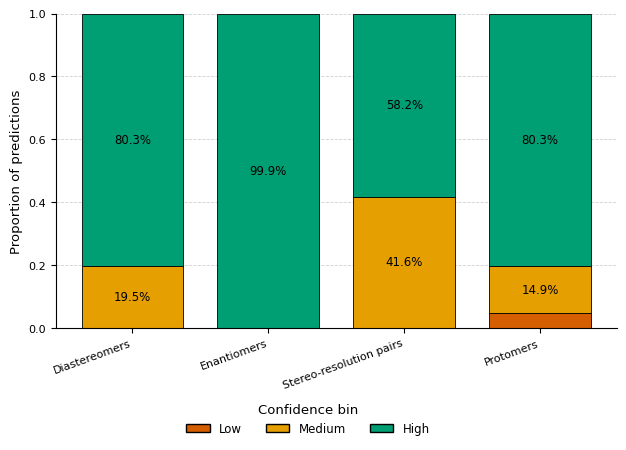

In [7]:
import pandas as pd
import numpy as np
import json, ast, re
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# =============================
# Config
# =============================
CLASS_COL = "classification"
EXCLUDE_CLASSES = {"Unclassified", "Unresolved"}  # set to set() to keep all
BIN_ORDER = ["low", "medium", "high"]            # enforce consistent order
LABEL_THRESHOLD = 0.06                            # show % labels for segments >= 6%
EDGE_COLOR = "black"
EDGE_WIDTH = 0.6
BAR_WIDTH = 0.75
SORT_BY = "high"                                  # sort classes by this bin descending


# =============================

# Journal constraint: text width 170 mm
TEXTWIDTH_MM = 160.0
INCH = 1 / 25.4
FIG_W = TEXTWIDTH_MM * INCH  # 6.69 in

# Typography (harmonised with other figures)
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "svg.fonttype": "none",

    "font.size": 9.5,
    "axes.titlesize": 10.5,
    "axes.labelsize": 9.5,
    "xtick.labelsize": 8.0,
    "ytick.labelsize": 8.0,
    "legend.fontsize": 8.5,
})

# =============================
# confidence_bin extraction regex
# =============================
_bin_regex = re.compile(r'"?confidence_bin"?\s*:\s*"?([A-Za-z]+)"?', re.IGNORECASE)

def extract_conf_bin(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return None
    if isinstance(x, dict):
        v = x.get("confidence_bin") or x.get("CONFIDENCE_BIN")
        return str(v).strip().lower() if v is not None else None
    if isinstance(x, str):
        s = x.strip()
        if s.lower() in {"low", "medium", "high"}:
            return s.lower()
        try:
            obj = json.loads(s)
            if isinstance(obj, dict):
                v = obj.get("confidence_bin") or obj.get("CONFIDENCE_BIN")
                if v is not None:
                    return str(v).strip().lower()
        except json.JSONDecodeError:
            pass
        try:
            obj = ast.literal_eval(s)
            if isinstance(obj, dict):
                v = obj.get("confidence_bin") or obj.get("CONFIDENCE_BIN")
                if v is not None:
                    return str(v).strip().lower()
        except (ValueError, SyntaxError):
            pass
        m = _bin_regex.search(s)
        if m:
            return m.group(1).strip().lower()
    return None

# =============================
# 1) Add / standardise confidence_bin column
# =============================
moldf["confidence_bin"] = (
    moldf["score_details"].apply(extract_conf_bin)
    .astype("category")
    .cat.set_categories(BIN_ORDER, ordered=True)
)

# =============================
# 2) Filter classes
# =============================
moldf_filtered = moldf[~moldf[CLASS_COL].isin(EXCLUDE_CLASSES)]
total_filtered_rels = len(moldf_filtered)
print(f"Total relationships (excluding {sorted(EXCLUDE_CLASSES)}): {total_filtered_rels}")

filtered = moldf_filtered.copy()

# per-class counts for the remaining classes
moldf_filtered_counts = filtered[CLASS_COL].value_counts()
print(moldf_filtered_counts)

# Okabe–Ito palette for bins (low→high)
bin_palette = {
    "low":    "#D55E00",  # vermilion
    "medium": "#E69F00",  # orange
    "high":   "#009E73",  # bluish green
}
default_bin_color = "#999999"

# =============================
# 3) Counts & proportions (class x bin)
# =============================
count_grid = (
    filtered
    .groupby([CLASS_COL, "confidence_bin"], observed=False)
    .size()
    .unstack(fill_value=0)
    .reindex(columns=BIN_ORDER, fill_value=0)
)

if SORT_BY in BIN_ORDER:
    order = count_grid.sort_values(by=SORT_BY, ascending=False).index.tolist()
    count_grid = count_grid.loc[order]

prop_grid = count_grid.div(count_grid.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

# =============================
# 4) Plot: stacked proportions with journal-constrained size
# =============================
n_classes = len(prop_grid.index)

# Dynamic height, capped and always below 225 mm (8.86 in)
base_h = 3.5      # base height in inches
per_class = 0.3  # extra per class
FIG_H = min(base_h + n_classes * per_class, 6.0)  # cap at 6 in

fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

x = np.arange(n_classes)
bottom = np.zeros(n_classes)

for col in BIN_ORDER:
    vals = prop_grid[col].values
    ax.bar(
        x, vals, BAR_WIDTH,
        bottom=bottom,
        label=col.capitalize(),
        color=bin_palette.get(col, default_bin_color),
        edgecolor=EDGE_COLOR,
        linewidth=EDGE_WIDTH,
    )
    # percentage labels inside segments if large enough
    for i, v in enumerate(vals):
        if v >= LABEL_THRESHOLD:
            ax.text(
                x[i],
                bottom[i] + v / 2,
                f"{v * 100:.1f}%",
                ha="center",
                va="center",
                fontsize=8.5,
                color="black",
            )
    bottom += vals

# axes and labels
ax.set_xticks(x)
ax.set_xticklabels(prop_grid.index, rotation=20, ha="right")
ax.set_ylim(0, 1)
ax.set_ylabel("Proportion of predictions")

# grid and spines
ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

# Legend below chart (within figure width)
legend_handles = [
    Patch(
        facecolor=bin_palette.get(b, default_bin_color),
        edgecolor=EDGE_COLOR,
        label=b.capitalize(),
    )
    for b in BIN_ORDER
    if b in prop_grid.columns
]

# Increase bottom area for xticks + legend
fig.subplots_adjust(left=0.10, right=0.99, top=0.92, bottom=0.25)

# Move legend safely below x tick labels
fig.legend(
    handles=legend_handles,
    title="Confidence bin",
    ncol=len(BIN_ORDER),
    loc="lower center",
    bbox_to_anchor=(0.5, 0.0),   # further down
    frameon=False,
)


# =============================
# 5) Summary tables (overall, filtered)
# =============================
total = len(filtered)
bin_totals = (
    filtered["confidence_bin"]
    .value_counts()
    .reindex(BIN_ORDER, fill_value=0)
)

summary_df = pd.DataFrame({
    "Confidence bin": BIN_ORDER,
    "Count": [int(bin_totals[b]) for b in BIN_ORDER],
    "% of total": [
        round(100 * bin_totals[b] / total, 2) if total else 0.0
        for b in BIN_ORDER
    ],
})

print("\nOverall confidence-bin summary (filtered):")
print(summary_df.to_string(index=False))

print("\nCounts by class x bin (filtered):")
print(count_grid.assign(total=count_grid.sum(axis=1)).to_string())

plt.show()


## Cluster composition (Figure 5)

In [8]:
# set up connection and cursour to the database
conn = sqlite3.connect(sqlite_file)
c = conn.cursor()

# check the expected tables are present
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()
tables = [t[0] for t in tables]
print("Expected tables: ['relationships', 'clusters']")
print("Actual tables in database:", tables)

Expected tables: ['relationships', 'clusters']
Actual tables in database: ['relationships', 'clusters']


In [9]:
# now lets have an initial look at the clusters table, see what sort of data we have
df_clusters_peek = pd.read_sql_query("SELECT * FROM clusters LIMIT 5;", conn)
df_clusters_peek

,cluster_id,is_undef_sru,is_def_sru,sru_repeat_count,member_count,members_json,members_hash
0,1,0,0,None,1,"[""SLM:000736507""]",db55be2239bd2eac03bb254a780c704ee87055d839e77b...
1,2,0,0,None,1,"[""SLM:000496071""]",0830b68b759c58b051c0feb193175c757e5e5a1692ac11...
2,3,0,0,None,1,"[""SLM:000491467""]",36e33cded4fa84438dc10a439001c7566b068adcf29343...
3,4,0,0,None,1,"[""SLM:000512033""]",c995e07bef761cf6d20a89ff3ef8b262b590caf1403226...
4,5,0,0,None,3,"[""chebi:80858"", ""keggC:C17009"", ""seedM:cpd17277""]",4cbda1ea6824f5b36c0cd005ca63f490be347642181d10...


All expected columns are present, each with the expected values. We can even see a case where a cluster has more than one member, indicating that the clustering algorithm performed as expected. Let's see the range of member counts we have in the dataset.

In [10]:
sql_range_member_counts = """
SELECT
    MIN(member_count) AS min_member_count,
    MAX(member_count) AS max_member_count,
    AVG(member_count) AS avg_member_count
FROM clusters;
"""

df_member_counts = pd.read_sql_query(sql_range_member_counts, conn)
df_member_counts

,min_member_count,max_member_count,avg_member_count
0,1,15,1.112457


From above, can see that the maximum amount of members in a cluster is 15, with the average member count essentially being 1. Perhaps, this was to be expected due to the strict nature of the stereomapper pipeline. Another possible factor for this maybe unexpected average value, is that structures in the represented database, may not reflect the exact structure they intend, so this may affect the expected identitiy clustering. This fact is highlighted in the study by Akhondi et al.,

In [11]:
# lets get the value counts of the different cluster sizes
sql_value_counts = """
SELECT
    member_count,
    COUNT(*) AS cluster_count
FROM clusters
GROUP BY member_count
ORDER BY member_count;
"""
df_value_counts = pd.read_sql_query(sql_value_counts, conn)

# calc percentages
total_clusters = df_value_counts["cluster_count"].sum()
df_value_counts["percentage"] = (df_value_counts["cluster_count"] / total_clusters) * 100
df_value_counts

,member_count,cluster_count,percentage
0,1,911453,92.259238
1,2,53627,5.428241
2,3,14788,1.496873
3,4,5578,0.564617
4,5,1652,0.167219
5,6,541,0.054761
6,7,199,0.020143
7,8,66,0.006681
8,9,13,0.001316
9,10,6,0.000607


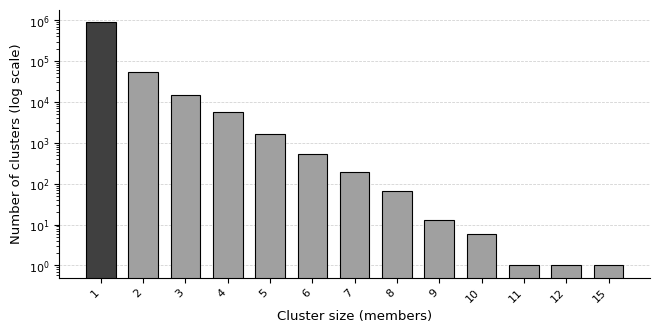

In [12]:
# ==== journal width constraint: 170 mm ====
TEXTWIDTH_MM = 165.0
INCH = 1/25.4
FIG_W = TEXTWIDTH_MM * INCH      # 6.69 in
FIG_H = 4.0                      # ~76 mm, safe under 225 mm

# ==== fonts for publication ====
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "pdf.fonttype": 42, "ps.fonttype": 42, "svg.fonttype": "none",

    # matched to your other figure's typography
    "font.size": 9.5,
    "axes.titlesize": 10.5,
    "axes.labelsize": 9.5,
    "xtick.labelsize": 8.0,
    "ytick.labelsize": 8.0,
})

# ---- data ----
sizes  = df_value_counts.iloc[:, 0].astype(int).to_numpy()
counts = df_value_counts.iloc[:, 1].astype(int).to_numpy()

order = np.argsort(sizes)
sizes, counts = sizes[order], counts[order]
pct = counts / counts.sum() * 100

# colour: singletons dark grey, others light grey
colors = ["#404040" if s == 1 else "#A0A0A0" for s in sizes]

# ==== figure ====
fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

x = np.arange(len(sizes))
ax.bar(x, counts, color=colors, width=0.7,
       edgecolor="black", linewidth=0.8)

# log scale for counts
ax.set_yscale("log")

# labels
ax.set_xlabel("Cluster size (members)")
ax.set_ylabel("Number of clusters (log scale)")

ax.set_xticks(x)
ax.set_xticklabels([str(s) for s in sizes], rotation=45, ha="right")

# grid + cosmetics
ax.yaxis.grid(True, linestyle="--", linewidth=0.55, alpha=0.6)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# keep layout clean inside 170 mm frame
fig.subplots_adjust(left=0.085, right=0.995, bottom=0.28, top=0.95)

plt.show()

As expected, the most common cluster member count is a value of 1, in line with the average calculated above. As member counts increase, the number of clusters representing this count decreases, a fact which was to be expected. Most clusters will sit in the range of having one to three members.